In [1]:
import pandas as pd

# Read the Excel file
demog_df = pd.read_excel('age_variable_importance.xlsx')

#Read the poi file
poi_df = pd.read_excel('GeoCom4.1_202509.xlsx', sheet_name='GeoCom')


In [2]:
# Remove trailing 'district' words from E_DISTRICT column
poi_df['E_DISTRICT'] = poi_df['E_DISTRICT'].str.replace(r'\s*District\s*$', '', case=False, regex=True)
poi_df['E_DISTRICT'] = poi_df['E_DISTRICT'].str.replace('&', 'and')
poi_df = poi_df.dropna(subset=['E_DISTRICT'])
print(poi_df['E_DISTRICT'].unique())

['Tsuen Wan' 'Eastern' 'North' 'Wong Tai Sin' 'Tuen Mun' 'Islands'
 'Tai Po' 'Southern' 'Yau Tsim Mong' 'Central and Western' 'Sha Tin'
 'Sai Kung' 'Kwun Tong' 'Kwai Tsing' 'Yuen Long' 'Kowloon City'
 'Sham Shui Po' 'Wan Chai']


In [3]:
#group the poi_df by E_DISTRICT and CLASS, then count the number of occurrences in each group
class_summary = poi_df.groupby(['E_DISTRICT', 'CLASS']).size().reset_index(name='Class_Count')
class_pivot = class_summary.pivot(index='E_DISTRICT', columns='CLASS', values='Class_Count').fillna(0).astype(int).reset_index()
print(class_pivot)


CLASS           E_DISTRICT   AMD  AQU  BGD  BUS  CMF  COM  CUF  GOV  HNC  MUF  \
0      Central and Western    87    0    2   64  198   16   91  246   61  135   
1                  Eastern    31    0   34   62  189   37   53  125   95  166   
2                  Islands   124   11   19   41   75   42   85  133   38  288   
3             Kowloon City    45    0    4   46  151   23   29  112   96  120   
4               Kwai Tsing    13    0   18  103  163   47   52   91   89  250   
5                Kwun Tong    11    0    1  125  203   44   52  134   75  201   
6                    North    16    0   15   84  116   70  165  115   61  374   
7                 Sai Kung    20   19    5   88  149   61  142   97   33  351   
8                  Sha Tin    14    6    9  130  226   62  129  128   67  326   
9             Sham Shui Po    52    0    1   54  192   28   33   98   88  145   
10                Southern    19   17   24   81  100   20   76  103   63  185   
11                  Tai Po  

In [4]:
#Merge the two DataFrames on the district columns
merged_df = pd.merge(demog_df, class_pivot, left_on='dc_eng', right_on='E_DISTRICT', how='left')

In [1]:
from IPython.display import display

# Rank districts by proportion of 65+ population (age_4) from highest to lowest
age_4_ranked = merged_df.sort_values(by='age_4', ascending=False)[['dc_eng', 'age_4', 'E_DISTRICT']]
print(age_4_ranked[['dc_eng', 'age_4']])

# Provide a summary of POI classes for the top 5 districts
top5_districts = age_4_ranked.head(5)['E_DISTRICT']
poi_summary = poi_df[poi_df['E_DISTRICT'].isin(top5_districts)].groupby(['E_DISTRICT', 'CLASS']).size().unstack(fill_value=0)
print(poi_summary)
poi_summary_df = poi_summary.reset_index()
display(poi_summary_df)

NameError: name 'merged_df' is not defined

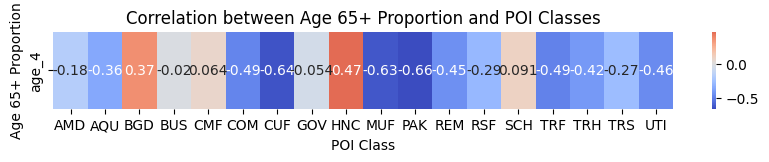

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select age proportion column and POI class columns for correlation
age_col = 'age_4'  # proportion of 65+ population
poi_class_cols = ['AMD', 'AQU', 'BGD', 'BUS', 'CMF', 'COM', 'CUF', 'GOV', 'HNC', 'MUF', 'PAK', 'REM', 'RSF', 'SCH', 'TRF', 'TRH', 'TRS', 'UTI']

# Compute correlation matrix between age_4 and POI classes
corr_df = merged_df[[age_col] + poi_class_cols].corr()

# Visualize correlation with heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(corr_df.loc[[age_col], poi_class_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Age 65+ Proportion and POI Classes')
plt.xlabel('POI Class')
plt.ylabel('Age 65+ Proportion')
plt.show()

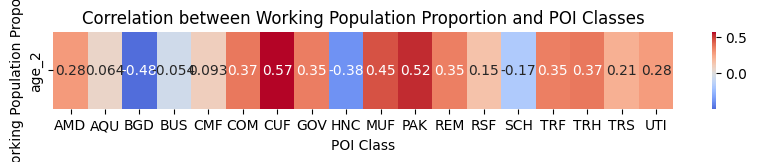

<Figure size 640x480 with 0 Axes>

In [ ]:
# Select age proportion column and POI class columns for correlation
age_col = 'age_2'  # proportion of 65+ population
poi_class_cols = ['AMD', 'AQU', 'BGD', 'BUS', 'CMF', 'COM', 'CUF', 'GOV', 'HNC', 'MUF', 'PAK', 'REM', 'RSF', 'SCH', 'TRF', 'TRH', 'TRS', 'UTI']

# Compute correlation matrix between age_4 and POI classes
corr_df = merged_df[[age_col] + poi_class_cols].corr()

# Visualize correlation with heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(corr_df.loc[[age_col], poi_class_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Working Population Proportion and POI Classes')
plt.xlabel('POI Class')
plt.ylabel('Working Population Proportion')
plt.show()
plt.tight_layout()
plt.show()

# The heatmap shows the correlation between the proportion of working population (age_2) and the counts of different POI classes across districts.
# Positive values indicate that districts with higher working population tend to have more of that POI class, while negative values suggest the opposite.
# The color intensity and annotated values reflect the strength and direction of these relationships.
# This helps identify which POI types are most associated with districts having a larger working-age population.


In [9]:
import numpy as np

# Normalize correlation scores to a 0-1 scale (min-max normalization)
corr_values = corr_df.loc['age_2', poi_class_cols]
min_corr = corr_values.min()
max_corr = corr_values.max()
normalized_scores = (corr_values - min_corr) / (max_corr - min_corr)

print("POI Class Importance Scores with working population Age Group (age_2) [0-1 scale]:")
print(normalized_scores.sort_values(ascending=False))



POI Class Importance Scores with working population Age Group (age_2) [0-1 scale]:
CUF    1.000000
PAK    0.959917
MUF    0.890925
TRH    0.809940
COM    0.808766
GOV    0.797356
REM    0.796439
TRF    0.795274
AMD    0.729965
UTI    0.724236
TRS    0.660687
RSF    0.598506
CMF    0.547945
AQU    0.520584
BUS    0.408118
SCH    0.300066
HNC    0.101520
BGD    0.000000
Name: age_2, dtype: float64


POI Class Importance Scores with Age Group 65+ (age_4) [0-1 scale]:
     Importance Score
HNC          1.000000
BGD          0.909788
SCH          0.665867
CMF          0.641444
BUS          0.567577
GOV          0.537959
AMD          0.427899
TRS          0.344621
RSF          0.327821
AQU          0.265694
TRH          0.215829
REM          0.188085
UTI          0.179375
COM          0.157249
TRF          0.150536
MUF          0.029093
CUF          0.022997
PAK          0.000000


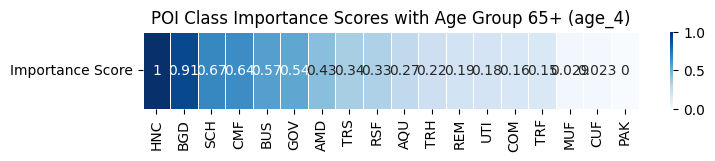

KeyError: 'age_2'

In [ ]:
import seaborn as sns

corr_values = corr_df.loc['age_4', poi_class_cols]
min_corr = corr_values.min()
max_corr = corr_values.max()
normalized_scores = (corr_values - min_corr) / (max_corr - min_corr)

print("POI Class Importance Scores with Age Group 65+ (age_4) [0-1 scale]:")
import matplotlib.pyplot as plt

# Convert normalized_scores to DataFrame for better visualization
norm_scores_df = normalized_scores.sort_values(ascending=False).to_frame(name='Importance Score')

# Display as table
print(norm_scores_df)

# Visualize as heatmap (blue-white color)
plt.figure(figsize=(8, 1))
sns.heatmap(norm_scores_df.T, annot=True, cmap='Blues', cbar=True, linewidths=0.5, linecolor='white')
plt.title('POI Class Importance Scores with Age Group 65+ (age_4)')
plt.yticks(rotation=0)
plt.show()


In [ ]:
# Select age proportion column and POI class columns for correlation
age_col = 'age_4'  # proportion of 65+ population
poi_class_cols = ['AMD', 'AQU', 'BGD', 'BUS', 'CMF', 'COM', 'CUF', 'GOV', 'HNC', 'MUF', 'PAK', 'REM', 'RSF', 'SCH', 'TRF', 'TRH', 'TRS', 'UTI']

# Compute correlation matrix between age_4 and POI classes
corr_df = merged_df[[age_col] + poi_class_cols].corr()

# Visualize correlation with heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(corr_df.loc[[age_col], poi_class_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Age 65+ Proportion and POI Classes')
plt.xlabel('POI Class')
plt.ylabel('Age 65+ Proportion')
plt.show()

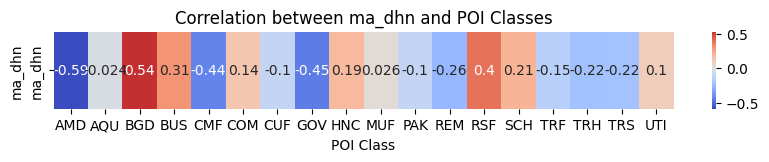

In [ ]:
# Select median household age column and POI class columns for correlation
ma_dhn_col = 'ma_dhn'  # numerical value

# Compute correlation matrix between ma_dhn and POI classes
corr_df_ma_dhn = merged_df[[ma_dhn_col] + poi_class_cols].corr()

# Visualize correlation with heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(corr_df_ma_dhn.loc[[ma_dhn_col], poi_class_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between ma_dhn and POI Classes')
plt.xlabel('POI Class')
plt.ylabel('ma_dhn')
plt.show()


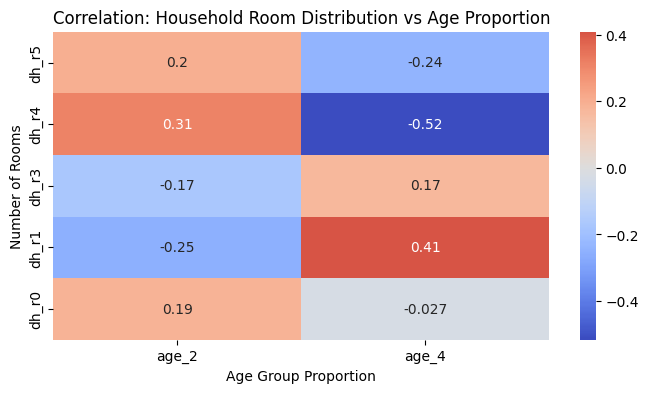

Normalized weights (scale out of 1):
          age_2     age_4
dh_r5  0.771534  0.295073
dh_r4  0.890750  0.000000
dh_r3  0.372007  0.743836
dh_r1  0.284194  1.000000
dh_r0  0.759888  0.528885


In [ ]:
# household room distribution and both age_groups
no_rooms = ['dh_r5', 'dh_r4', 'dh_r3', 'dh_r1', 'dh_r0']
# Calculate correlation between household room distribution and age proportions
age_cols = ['age_2', 'age_4']  # age group proportions
room_corr_df = merged_df[no_rooms + age_cols].corr()

# Visualize correlation between room distribution and age proportions
plt.figure(figsize=(8, 4))
sns.heatmap(room_corr_df.loc[no_rooms, age_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Household Room Distribution vs Age Proportion')
plt.xlabel('Age Group Proportion')
plt.ylabel('Number of Rooms')
plt.show()

# Normalize correlation values for each room type with age groups (min-max scaling)
room_age_corr = room_corr_df.loc[no_rooms, age_cols]
min_val = room_age_corr.min().min()
max_val = room_age_corr.max().max()
normalized_room_age_corr = (room_age_corr - min_val) / (max_val - min_val)

print("Normalized weights (scale out of 1):")
print(normalized_room_age_corr)

# The heatmap above shows the correlation between the distribution of household room numbers and the proportions of working-age (age_2) and elderly (age_4) populations across districts.
# Positive correlation values indicate that districts with more households of a certain room count tend to have higher proportions of the corresponding age group.
# Negative values suggest the opposite relationship.
# The normalized weights table provides a scaled comparison (0-1) of how strongly each room type is associated with each age group, making it easier to identify which room distributions are most relevant for each demographic.

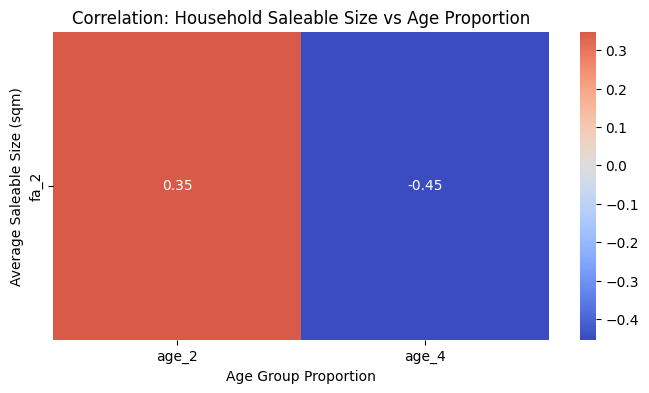

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# median saleable size(square meter) and both age_groups
size = ['fa_2']
# Calculate correlation between household accommodation size and age proportions
age_cols = ['age_2', 'age_4']  # age group proportions
size_corr_df = merged_df[size + age_cols].corr()

# Visualize correlation between accommodation size and age proportions
plt.figure(figsize=(8, 4))
sns.heatmap(size_corr_df.loc[size, age_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Household Saleable Size vs Age Proportion')
plt.xlabel('Age Group Proportion')
plt.ylabel('Average Saleable Size (sqm)')
plt.show()
# This shows the correlation between median household saleable size (fa_2) and age group proportions (age_1, age_2, age_3, age_4).
# The heatmap visualizes how strongly saleable size is associated with each age group across districts.
# Positive values indicate that larger saleable size tends to be found in districts with higher proportions of that age group, while negative values indicate the opposite.
# The strength of the correlation is shown by the color intensity and the annotated values in the heatmap.

In [17]:
#Asses internal housing features e.g. household room distribution and median accommodation size with age groups

# Correlation: household room distribution and accommodation size with age groups
room_cols = ['dh_r5', 'dh_r4', 'dh_r3', 'dh_r2'dh_r1', 'dh_r0']
size_col = 'fa_2'
age_cols = ['age_1', 'age_2', 'age_3', 'age_4']

# Combine room and size columns
features = room_cols + [size_col]
corr_df = merged_df[features + age_cols].corr()

# Normalize correlation values for each feature with age groups (min-max scaling)
feature_age_corr = corr_df.loc[features, age_cols]
min_val = feature_age_corr.min().min()
max_val = feature_age_corr.max().max()
normalized_feature_age_corr = (feature_age_corr - min_val) / (max_val - min_val)

# Visualize both raw and normalized correlations side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(feature_age_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Raw Correlation: Room Distribution & Accommodation Size vs Age Groups')
axes[0].set_xlabel('Age Group Proportion')
axes[0].set_ylabel('Housing Feature')

sns.heatmap(normalized_feature_age_corr, annot=True, cmap='YlGnBu', vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Normalized Weights (0-1): Room Distribution & Accommodation Size vs Age Groups')
axes[1].set_xlabel('Age Group Proportion')
axes[1].set_ylabel('Housing Feature')

plt.tight_layout()
plt.show()

print("Normalized weights (scale out of 1):")
print(normalized_feature_age_corr)

SyntaxError: unterminated string literal (detected at line 4) (1025301708.py, line 4)

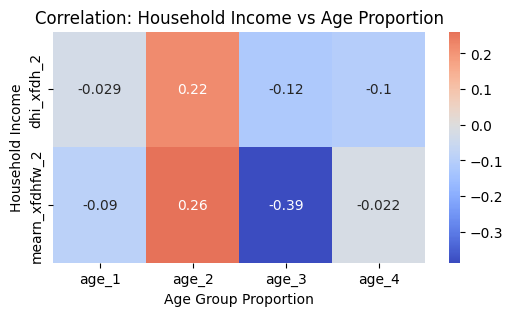

In [26]:
# Household income and for age poportion
# Select household income columns (example: dhi_1, dhi_2, dhi_3) and age proportion columns
income_cols = ['dhi_xfdh_2','mearn_xfdhfw_2']
age_cols = ['age_1', 'age_2', 'age_3', 'age_4']

# Compute correlation matrix between household income and age proportions
income_age_corr_df = merged_df[income_cols + age_cols].corr()

# Visualize correlation between household income and age proportions
plt.figure(figsize=(6, 3))
sns.heatmap(income_age_corr_df.loc[income_cols, age_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Household Income vs Age Proportion')
plt.xlabel('Age Group Proportion')
plt.ylabel('Household Income')
plt.show()

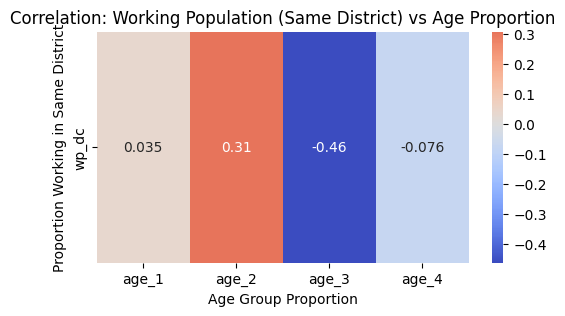

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns   
# Proportion of working population with a fixed place of work in Hong Kong who worked in the same District Council district as their residence (including those working at home)

income_cols = ['wp_dc']
age_cols = ['age_1', 'age_2', 'age_3', 'age_4']

# Compute correlation matrix between working population (same district) and age proportions
income_age_corr_df = merged_df[income_cols + age_cols].corr()

# Visualize correlation between working population (same district) and age proportions
plt.figure(figsize=(6, 3))
sns.heatmap(income_age_corr_df.loc[income_cols, age_cols], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation: Working Population (Same District) vs Age Proportion')
plt.xlabel('Age Group Proportion')
plt.ylabel('Proportion Working in Same District')
plt.show()


In [ ]:
merged_df.head()